<a href="https://colab.research.google.com/github/Jaskirat1/AIT_NLP/blob/main/Movies_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('movies.csv')

In [6]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0.0,237000000.0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995.0,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1.0,300000000.0,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285.0,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2.0,245000000.0,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647.0,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3.0,250000000.0,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026.0,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4.0,260000000.0,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529.0,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4805 non-null   float64
 1   budget                4803 non-null   float64
 2   genres                4805 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   float64
 5   keywords              4805 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   float64
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [8]:
df.isnull().sum()

index                      0
budget                     2
genres                     0
homepage                3093
id                         2
keywords                   0
original_language          2
original_title             2
overview                   5
popularity                 2
production_companies       2
production_countries       2
release_date               3
revenue                    2
runtime                    4
spoken_languages           2
status                     2
tagline                  846
title                      0
vote_average               2
vote_count                 2
cast                       0
crew                       2
director                   0
combined_features          0
dtype: int64

In [12]:
features = ['genres', 'keywords', 'cast', 'director']

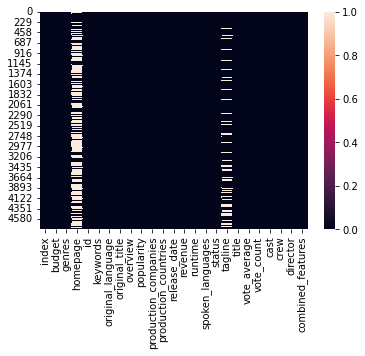

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'combined_features'],
      dtype='object')

In [18]:
for feature in features:
  df[feature].fillna(' ', inplace = True)

In [20]:
df[feature].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [22]:
def combine_features(row):
  return row['genres'] + " " + row['keywords'] + " " + row['cast'] + " " + row['director']


In [29]:
df['combined_features'] = df[features].apply(combine_features, axis = 1)

In [30]:
df.combined_features.head()

0    Action Adventure Fantasy Science Fiction cultu...
1    Adventure Fantasy Action ocean drug abuse exot...
2    Action Adventure Crime spy based on novel secr...
3    Action Crime Drama Thriller dc comics crime fi...
4    Action Adventure Science Fiction based on nove...
Name: combined_features, dtype: object

In [33]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'combined_features', 'combine_features'],
      dtype='object')

In [36]:
df.drop(['combine_features'], axis = 1, inplace = True)

In [37]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'combined_features'],
      dtype='object')

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
cv = CountVectorizer()

In [40]:
count_matrix = cv.fit_transform(df['combined_features'])

In [41]:
cosin_sim = cosine_similarity(count_matrix)

In [43]:
cosin_sim.shape

(4805, 4805)

In [45]:
cosin_sim[0]

array([1.        , 0.10540926, 0.12038585, ..., 0.        , 0.23210354,
       0.23210354])

In [46]:
cosin_sim[1]

array([0.10540926, 1.        , 0.0761387 , ..., 0.        , 0.22019275,
       0.22019275])

In [47]:
def get_title(index):
  return df[df['index'] == index]['title'].iloc[0]

In [49]:
def get_index(title):
  return int(df[df['title'].str.lower() == title.lower()]['index'].iloc[0])

get_title(1000)

'Drive Angry'

In [52]:
get_index('Batman')

1359

In [53]:
movie_user_likes = input("Enter a movie you like: ")

Enter a movie you like: batman


In [54]:
movie_index = get_index(movie_user_likes)

In [55]:
movie_index

1359

In [57]:
similar_movies = cosin_sim[movie_index]

In [58]:
similar_movies

array([0.07698004, 0.10954451, 0.08340577, ..., 0.        , 0.18090681,
       0.18090681])

In [61]:
sorted_movies = sorted(enumerate(similar_movies), reverse = True, key= lambda movie: movie[1])[1:]

In [62]:
sorted_movies

[(428, 0.6531972647421809),
 (210, 0.42339019740572564),
 (3, 0.3530090432487313),
 (65, 0.3530090432487313),
 (119, 0.3530090432487313),
 (753, 0.28284271247461906),
 (2530, 0.2683281572999748),
 (1035, 0.24494897427831785),
 (2635, 0.23533936216582085),
 (813, 0.23094010767585035),
 (4638, 0.23094010767585035),
 (14, 0.22677868380553634),
 (4065, 0.22677868380553634),
 (2793, 0.223606797749979),
 (1803, 0.22360679774997896),
 (2047, 0.22360679774997896),
 (2655, 0.22360679774997896),
 (3637, 0.22360679774997896),
 (278, 0.21908902300206645),
 (215, 0.21821789023599242),
 (1009, 0.21821789023599242),
 (2313, 0.21320071635561044),
 (2858, 0.21320071635561044),
 (3372, 0.21320071635561044),
 (3630, 0.21320071635561044),
 (3774, 0.21320071635561044),
 (207, 0.2085144140570748),
 (299, 0.2085144140570748),
 (1512, 0.2085144140570748),
 (1792, 0.2085144140570748),
 (2029, 0.2085144140570748),
 (3854, 0.2085144140570748),
 (4675, 0.2085144140570748),
 (3306, 0.2065591117977289),
 (1827, 0.2

In [65]:
num = int(input('Enter number of recommendation: '))


Enter number of recommendation: 10


In [66]:
for movie in sorted_movies[:num]:
  movie_name  = get_title(movie[0])
  print(movie_name)

Batman Returns
Batman & Robin
The Dark Knight Rises
The Dark Knight
Batman Begins
The Sentinel
Beetlejuice
Jonah Hex
Funny Games
Superman
